In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import RocCurveDisplay
import joblib



In [3]:
dataframe=pd.read_csv('D:/credit score/train.csv')
dataframe.dtypes

C:\Users\HP\AppData\Local\Temp\ipykernel_11732\4166694619.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe=pd.read_csv('D:/credit score/train.csv')


ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [4]:
# colsconvert=dataframe.select_dtypes(include=['object']).columns
# dataframe[colsconvert]=dataframe[colsconvert].apply(pd.to_numeric, errors='coerce')
# corelation_matrix=dataframe.corr()
# plt.figure(figsize=(18,13))
# sns.heatmap(corelation_matrix,
#             annot=True,
#             cmap='coolwarm',
#             center=0,
#             square=True,
#             fmt='.2f')
# plt.show()

In [5]:
df=dataframe.drop(["ID","Customer_ID","Name","Age","SSN","Occupation","Monthly_Inhand_Salary","Num_Bank_Accounts","Credit_Mix","Credit_Utilization_Ratio",
               "Payment_of_Min_Amount","Total_EMI_per_month","Payment_Behaviour","Type_of_Loan","Month"],axis=1)

In [6]:
df

,Annual_Income,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,19114.12,4,3,4,3,7,11.27,4.0,809.98,22 Years and 1 Months,80.41529543900253,312.49408867943663,Good
1,19114.12,4,3,4,-1,NaN,11.27,4.0,809.98,NaN,118.28022162236736,284.62916249607184,Good
2,19114.12,4,3,4,3,7,_,4.0,809.98,22 Years and 3 Months,81.699521264648,331.2098628537912,Good
3,19114.12,4,3,4,5,4,6.27,4.0,809.98,22 Years and 4 Months,199.4580743910713,223.45130972736786,Good
4,19114.12,4,3,4,6,NaN,11.27,4.0,809.98,22 Years and 5 Months,41.420153086217326,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39628.99,6,7,2,23,7,11.5,3.0,502.38,31 Years and 6 Months,60.97133255718485,479.866228,Poor
99996,39628.99,6,7,2,18,7,11.5,3.0,502.38,31 Years and 7 Months,54.18595028760385,496.65161,Poor
99997,39628.99,6,5729,2,27,6,11.5,3.0,502.38,31 Years and 8 Months,24.02847744864441,516.809083,Poor
99998,39628.99,6,7,2,20,NaN,11.5,3.0,502.38,31 Years and 9 Months,251.67258219721603,319.164979,Standard


In [7]:
df=df.drop_duplicates()

In [8]:
df.fillna(df.median(numeric_only=True),inplace=True)
df.fillna(df.mode().iloc[0],inplace=True)

In [9]:
print((df==0).sum())

Annual_Income                 0
Num_Credit_Card              13
Interest_Rate                 0
Num_of_Loan                   0
Delay_from_due_date        1195
Num_of_Delayed_Payment        0
Changed_Credit_Limit          0
Num_Credit_Inquiries       6972
Outstanding_Debt              0
Credit_History_Age            0
Amount_invested_monthly       0
Monthly_Balance               0
Credit_Score                  0
dtype: int64


In [10]:
df.replace(0,np.nan)
df.fillna(df.median(numeric_only=True),inplace=True)

In [11]:
df

,Annual_Income,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,19114.12,4,3,4,3,7,11.27,4.0,809.98,22 Years and 1 Months,80.41529543900253,312.49408867943663,Good
1,19114.12,4,3,4,-1,19,11.27,4.0,809.98,15 Years and 11 Months,118.28022162236736,284.62916249607184,Good
2,19114.12,4,3,4,3,7,_,4.0,809.98,22 Years and 3 Months,81.699521264648,331.2098628537912,Good
3,19114.12,4,3,4,5,4,6.27,4.0,809.98,22 Years and 4 Months,199.4580743910713,223.45130972736786,Good
4,19114.12,4,3,4,6,19,11.27,4.0,809.98,22 Years and 5 Months,41.420153086217326,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39628.99,6,7,2,23,7,11.5,3.0,502.38,31 Years and 6 Months,60.97133255718485,479.866228,Poor
99996,39628.99,6,7,2,18,7,11.5,3.0,502.38,31 Years and 7 Months,54.18595028760385,496.65161,Poor
99997,39628.99,6,5729,2,27,6,11.5,3.0,502.38,31 Years and 8 Months,24.02847744864441,516.809083,Poor
99998,39628.99,6,7,2,20,19,11.5,3.0,502.38,31 Years and 9 Months,251.67258219721603,319.164979,Standard


In [12]:
df.dtypes

Annual_Income               object
Num_Credit_Card              int64
Interest_Rate                int64
Num_of_Loan                 object
Delay_from_due_date          int64
Num_of_Delayed_Payment      object
Changed_Credit_Limit        object
Num_Credit_Inquiries       float64
Outstanding_Debt            object
Credit_History_Age          object
Amount_invested_monthly     object
Monthly_Balance             object
Credit_Score                object
dtype: object

In [13]:
df[['Num_Credit_Inquiries']]=df[['Num_Credit_Inquiries']].round(2)

In [14]:
df

,Annual_Income,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,19114.12,4,3,4,3,7,11.27,4.0,809.98,22 Years and 1 Months,80.41529543900253,312.49408867943663,Good
1,19114.12,4,3,4,-1,19,11.27,4.0,809.98,15 Years and 11 Months,118.28022162236736,284.62916249607184,Good
2,19114.12,4,3,4,3,7,_,4.0,809.98,22 Years and 3 Months,81.699521264648,331.2098628537912,Good
3,19114.12,4,3,4,5,4,6.27,4.0,809.98,22 Years and 4 Months,199.4580743910713,223.45130972736786,Good
4,19114.12,4,3,4,6,19,11.27,4.0,809.98,22 Years and 5 Months,41.420153086217326,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39628.99,6,7,2,23,7,11.5,3.0,502.38,31 Years and 6 Months,60.97133255718485,479.866228,Poor
99996,39628.99,6,7,2,18,7,11.5,3.0,502.38,31 Years and 7 Months,54.18595028760385,496.65161,Poor
99997,39628.99,6,5729,2,27,6,11.5,3.0,502.38,31 Years and 8 Months,24.02847744864441,516.809083,Poor
99998,39628.99,6,7,2,20,19,11.5,3.0,502.38,31 Years and 9 Months,251.67258219721603,319.164979,Standard


In [15]:
def convert_to_months(age_str):
    numbers=re.findall(r'\d+',age_str)
    years=int (numbers[0])
    months=int(numbers[1])
    return years*12+months
df['Credit_History_Age']=df['Credit_History_Age'].apply(convert_to_months)

In [16]:
df

,Annual_Income,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,19114.12,4,3,4,3,7,11.27,4.0,809.98,265,80.41529543900253,312.49408867943663,Good
1,19114.12,4,3,4,-1,19,11.27,4.0,809.98,191,118.28022162236736,284.62916249607184,Good
2,19114.12,4,3,4,3,7,_,4.0,809.98,267,81.699521264648,331.2098628537912,Good
3,19114.12,4,3,4,5,4,6.27,4.0,809.98,268,199.4580743910713,223.45130972736786,Good
4,19114.12,4,3,4,6,19,11.27,4.0,809.98,269,41.420153086217326,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39628.99,6,7,2,23,7,11.5,3.0,502.38,378,60.97133255718485,479.866228,Poor
99996,39628.99,6,7,2,18,7,11.5,3.0,502.38,379,54.18595028760385,496.65161,Poor
99997,39628.99,6,5729,2,27,6,11.5,3.0,502.38,380,24.02847744864441,516.809083,Poor
99998,39628.99,6,7,2,20,19,11.5,3.0,502.38,381,251.67258219721603,319.164979,Standard


In [17]:
df['Credit_Score']=df['Credit_Score'].map({'Good':1,'Standard':1,'Poor':0})

In [18]:
df

,Annual_Income,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,19114.12,4,3,4,3,7,11.27,4.0,809.98,265,80.41529543900253,312.49408867943663,1
1,19114.12,4,3,4,-1,19,11.27,4.0,809.98,191,118.28022162236736,284.62916249607184,1
2,19114.12,4,3,4,3,7,_,4.0,809.98,267,81.699521264648,331.2098628537912,1
3,19114.12,4,3,4,5,4,6.27,4.0,809.98,268,199.4580743910713,223.45130972736786,1
4,19114.12,4,3,4,6,19,11.27,4.0,809.98,269,41.420153086217326,341.48923103222177,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39628.99,6,7,2,23,7,11.5,3.0,502.38,378,60.97133255718485,479.866228,0
99996,39628.99,6,7,2,18,7,11.5,3.0,502.38,379,54.18595028760385,496.65161,0
99997,39628.99,6,5729,2,27,6,11.5,3.0,502.38,380,24.02847744864441,516.809083,0
99998,39628.99,6,7,2,20,19,11.5,3.0,502.38,381,251.67258219721603,319.164979,1


In [19]:
colsconvert=df.select_dtypes(include=['object']).columns
df[colsconvert]=df[colsconvert].apply(pd.to_numeric, errors='coerce')

In [20]:
df.dtypes

Annual_Income              float64
Num_Credit_Card              int64
Interest_Rate                int64
Num_of_Loan                float64
Delay_from_due_date          int64
Num_of_Delayed_Payment     float64
Changed_Credit_Limit       float64
Num_Credit_Inquiries       float64
Outstanding_Debt           float64
Credit_History_Age           int64
Amount_invested_monthly    float64
Monthly_Balance            float64
Credit_Score                 int64
dtype: object

In [21]:
df

,Annual_Income,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,19114.12,4,3,4.0,3,7.0,11.27,4.0,809.98,265,80.415295,312.494089,1
1,19114.12,4,3,4.0,-1,19.0,11.27,4.0,809.98,191,118.280222,284.629162,1
2,19114.12,4,3,4.0,3,7.0,NaN,4.0,809.98,267,81.699521,331.209863,1
3,19114.12,4,3,4.0,5,4.0,6.27,4.0,809.98,268,199.458074,223.451310,1
4,19114.12,4,3,4.0,6,19.0,11.27,4.0,809.98,269,41.420153,341.489231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39628.99,6,7,2.0,23,7.0,11.50,3.0,502.38,378,60.971333,479.866228,0
99996,39628.99,6,7,2.0,18,7.0,11.50,3.0,502.38,379,54.185950,496.651610,0
99997,39628.99,6,5729,2.0,27,6.0,11.50,3.0,502.38,380,24.028477,516.809083,0
99998,39628.99,6,7,2.0,20,19.0,11.50,3.0,502.38,381,251.672582,319.164979,1


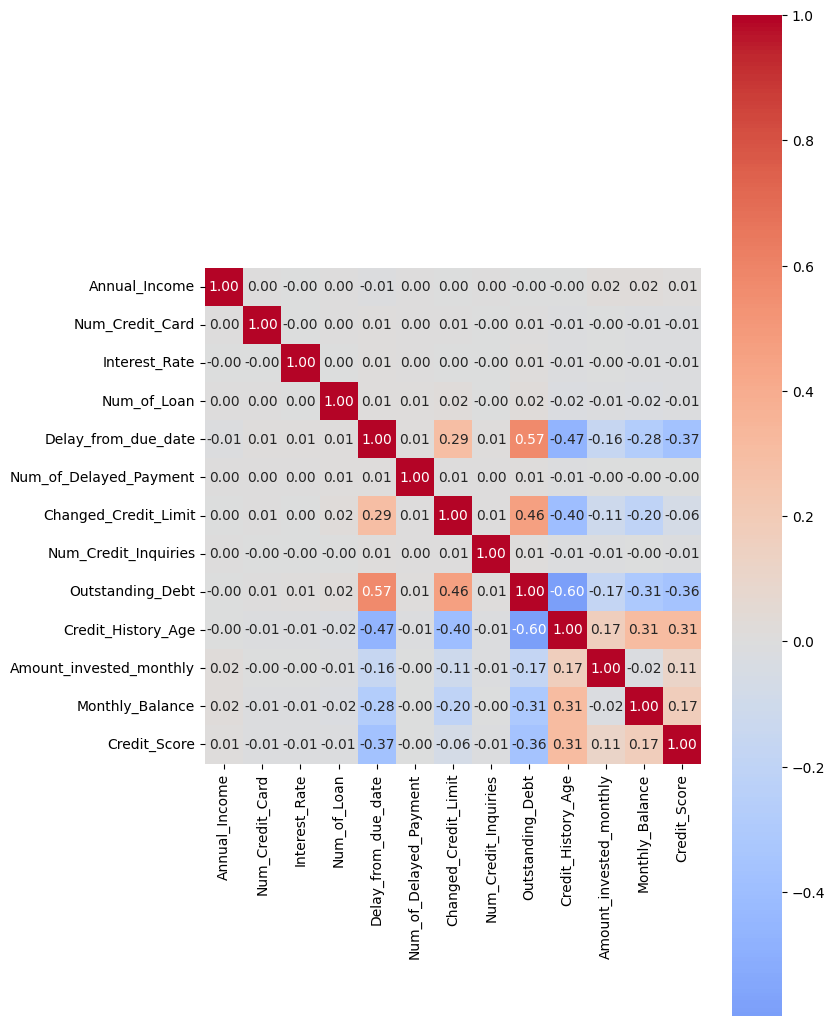

In [22]:
corelation_matrix=df.corr()
plt.figure(figsize=(8,13))
sns.heatmap(corelation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f')
plt.show()

In [23]:
comb_df=pd.concat([df,dataframe[['Monthly_Inhand_Salary','Total_EMI_per_month']]],axis=1)
comb_df=comb_df.fillna(comb_df.mean())

In [24]:
print (comb_df['Credit_Score'].value_counts())


Credit_Score
1    71002
0    28998
Name: count, dtype: int64


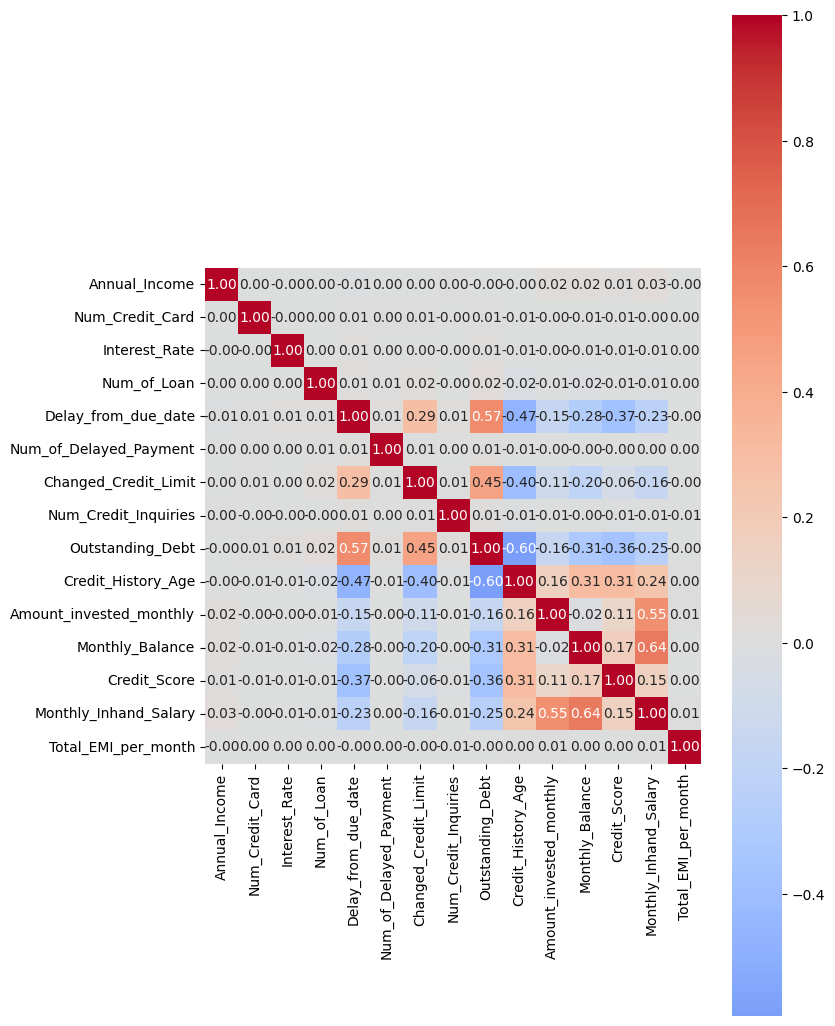

In [25]:
corelation_matrix=comb_df.corr()
plt.figure(figsize=(8,13))
sns.heatmap(corelation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f')
plt.show()

In [26]:
x=comb_df.drop("Credit_Score" ,axis=1)
y=comb_df["Credit_Score"]

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


In [28]:
x_train

,Annual_Income,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Monthly_Inhand_Salary,Total_EMI_per_month
75220,101399.130000,3,2,2.0,14,6.000000,4.97,4.0,1061.06,297,114.299386,856.618467,8535.927500,132.674897
48955,112882.680000,1,10,4.0,12,10.000000,6.24,0.0,722.90,347,166.446410,688.426466,9684.890000,353.616124
44966,28101.460000,7,8,3.0,28,8.000000,1.85,4.0,454.67,321,195.539456,242.921080,2173.463807,268.268012
13568,22438.270000,7,9,4.0,16,13.000000,11.24,3.0,167.57,191,105.165644,292.083631,1856.855833,58.436308
92727,20975.400000,3,9,1.0,2,9.000000,9.94,1.0,731.40,291,67.158201,361.040007,1943.950000,16.196792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,82065.160000,5,3,3.0,12,9.000000,5.55,1.0,106.83,276,439.840179,316.995547,6771.763333,180.340607
54886,14920.970000,10,16,2.0,61,16.000000,13.48,6.0,1288.58,161,110.084240,302.447665,1424.414167,19.909512
76820,66858.270000,6,3990,4.0,8,30.166725,4.16,4.0,601.58,337,364.707052,317.330016,5770.522500,175.015182
860,178578.964199,7,3,3.0,12,9.000000,3.90,2.0,339.11,200,169.858197,251.421930,1904.950417,39.214914


In [149]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [150]:
y_pred=rf.predict(x_test)

In [151]:
ac=accuracy_score(y_test,y_pred)
ac

0.86775

In [152]:
clf=classification_report(y_test,y_pred)
print(f"classification report:{clf}")

classification report:              precision    recall  f1-score   support

           0       0.79      0.75      0.77      5874
           1       0.90      0.92      0.91     14126

    accuracy                           0.87     20000
   macro avg       0.84      0.83      0.84     20000
weighted avg       0.87      0.87      0.87     20000



In [161]:
rf_probs=rf.predict_proba(x_test)[:,1]
rf_auc=roc_auc_score(y_test,rf_probs)
rf_auc

np.float64(0.9260901364831166)

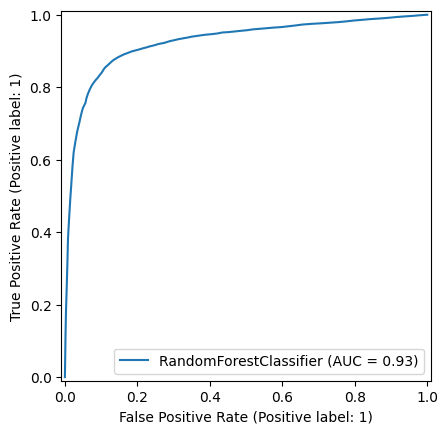

In [171]:
RocCurveDisplay.from_estimator(rf, x_test, y_test)
plt.show()

In [174]:
joblib.dump(rf,"randomforest.pkl")

['randomforest.pkl']

In [163]:
base_lr=LogisticRegression(solver='liblinear',class_weight='balanced')
bagging=BaggingClassifier( 
    estimator=base_lr,
    n_estimators=10,               # Number of bootstrap models
    max_samples=0.8,               # Fraction of samples to draw for each base estimator
    max_features=1.0,              # Use all features
    bootstrap=True,                # Sample with replacement
    n_jobs=-1,
    random_state=42)

In [164]:
bagging.fit(x_train,y_train)

BaggingClassifier(estimator=LogisticRegression(class_weight='balanced',
                                               solver='liblinear'),
                  max_samples=0.8, n_jobs=-1, random_state=42)

In [165]:
y_preddlr=bagging.predict(x_test)

In [166]:
lrac=accuracy_score(y_test,y_preddlr)
lrac

0.7624

In [167]:
lrclf=classification_report(y_test,y_preddlr)
print(f"classification report:{lrclf}")

classification report:              precision    recall  f1-score   support

           0       0.58      0.69      0.63      5874
           1       0.86      0.79      0.82     14126

    accuracy                           0.76     20000
   macro avg       0.72      0.74      0.73     20000
weighted avg       0.78      0.76      0.77     20000



In [168]:
lr_probs=bagging.predict_proba(x_test)[:,1]
lrroc=roc_auc_score(y_test,lr_probs)
lrroc

np.float64(0.7801360907144806)

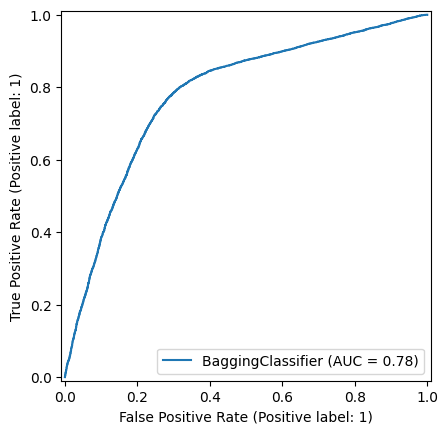

In [170]:
RocCurveDisplay.from_estimator(bagging, x_test, y_test)
plt.show()

In [173]:
joblib.dump(bagging,'lr_baggingmodel.pkl')

['lr_baggingmodel.pkl']